In [5]:
#import necessary libraries
from igraph import *
import networkx as nx
from tqdm import tqdm
from joblib import Parallel, delayed
from datetime import datetime
from matplotlib import pyplot as plt

In [6]:
g = nx.DiGraph()

In [7]:
print(g)

DiGraph with 0 nodes and 0 edges


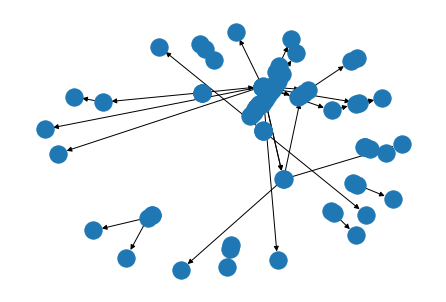

In [20]:
import matplotlib.pyplot as plt
nx.draw(g)

In [ ]:
pip install stellargraph

In [22]:
from stellargraph import StellarGraph
square_foo_bar = StellarGraph.from_networkx(g)
print(square_foo_bar.info())

StellarDiGraph: Directed multigraph
 Nodes: 96, Edges: 101

 Node types:
  transaction: [70]
    Features: none
    Edge types: transaction-default->address
  address: [26]
    Features: none
    Edge types: address-default->transaction

 Edge types:
    transaction-default->address: [58]
        Weights: range=[1e+06, 1.9e+12], mean=1.69528e+11, std=3.88977e+11
        Features: none
    address-default->transaction: [43]
        Weights: range=[1e+06, 1.9e+12], mean=2.11205e+11, std=4.37716e+11
        Features: none


In [72]:
def get_node_details(g,my_node):
    #type of node
    print("the node",my_node,"is a",g.nodes[my_node]['label'])

    #total edges incident on/from node
    if g.nodes[my_node]['label'] == "address":
        print("\nthe total input and output transactions related to address",my_node,"are",g.degree[my_node])
    else:
        print("\nthe total input and output addresses related to transaction",my_node,"are",g.degree[my_node])

    #successsors nodes and weights
    my_node_successors_list = []
    my_node_successors_list= list(g.successors(my_node))

    my_node_successors_address_list = []
    my_node_successors_address_weight = []
    my_node_successors_transaction_list = []
    my_node_successors_transaction_weight = []
    sum_of_successor_amount = 0

    for i in range (0,len(my_node_successors_list)):
        my_node_successors = my_node_successors_list[i]
        my_node_weight = g[my_node][my_node_successors]['weight'] #getting weight of directed edge from my_node to successors
        sum_of_successor_amount += my_node_weight #adding up weights
        if g.nodes[my_node_successors]['label'] == "address":
            my_node_successors_address_list.append(my_node_successors)
            my_node_successors_address_weight.append(my_node_weight) 
        else:
            my_node_successors_transaction_list.append(my_node_successors)
            my_node_successors_transaction_weight.append(my_node_weight)
            #g.nodes[my_node_successors]['label'] == "transaction"

    print("\nthe",g.nodes[my_node]['label'],"'",my_node,"' is the input for the following transactions:",my_node_successors_transaction_list,"with weights",my_node_successors_transaction_weight)
    print("the",g.nodes[my_node]['label'],"'",my_node,"' has the following output addresses:",my_node_successors_address_list,"with weights",my_node_successors_address_weight)
    print("the total outgoing amount from the",g.nodes[my_node]['label'],"'",my_node,"' is",sum_of_successor_amount)


    #predecessors nodes and weights
    my_node_predecessors_list = []
    my_node_predecessors_list= list(g.predecessors(my_node))

    my_node_predecessors_address_list = []
    my_node_predecessors_address_weight = []
    my_node_predecessors_transaction_list = []
    my_node_predecessors_transaction_weight = []
    sum_of_predecessor_amount = 0

    for i in range (0,len(my_node_predecessors_list)):
        my_node_predecessors = my_node_predecessors_list[i]
        my_node_weight = g[my_node_predecessors][my_node]['weight'] #getting weight of directed edge from predecessors to my_node
        sum_of_predecessor_amount += my_node_weight
        if g.nodes[my_node_predecessors]['label'] == "address":
            my_node_predecessors_address_list.append(my_node_predecessors)
            my_node_predecessors_address_weight.append(my_node_weight)
        else:
            my_node_predecessors_transaction_list.append(my_node_predecessors)
            my_node_predecessors_transaction_weight.append(my_node_weight)
            #g.nodes[my_node_predecessors]['label'] == "transaction"

    print("\nthe",g.nodes[my_node]['label'],"'",my_node,"' is the output for the following transactions:",my_node_predecessors_transaction_list,"with weights",my_node_predecessors_transaction_weight)
    print("the",g.nodes[my_node]['label'],"'",my_node,"' has the following input addresses:",my_node_predecessors_address_list,"with weights",my_node_predecessors_address_weight)
    print("the total incoming amount to the",g.nodes[my_node]['label'],"'",my_node,"' is",sum_of_predecessor_amount)

    #understanding the balance amount (output amount - input amount)
    if g.nodes[my_node]['label'] == "address":
        print("\nthe remaining balance of address",my_node,"is",sum_of_predecessor_amount-sum_of_successor_amount)
    else:
        print("\nthe transaction fee for this transaction",my_node,"is",sum_of_predecessor_amount-sum_of_successor_amount)

    
    #subgraph for my_node
    nodelist = [my_node]
    nodelist.extend(my_node_successors_list)
    nodelist.extend(my_node_predecessors_list)
    g2 = g.subgraph(nodelist)
    pos=nx.circular_layout(g2)
    #pos = nx.spring_layout(g2, seed=7)
    nx.draw(g2, pos, with_labels=True)


the node 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X is a address

the total input and output transactions related to address 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X are 17

the address ' 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X ' is the input for the following transactions: ['8713', '15208'] with weights [5000000000, 200000000000]
the address ' 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X ' has the following output addresses: [] with weights []
the total outgoing amount from the address ' 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X ' is 205000000000

the address ' 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X ' is the output for the following transactions: ['43196', '69689', '45303', '9430', '53300', '25847', '112274', '63112', '10608', '7638', '90617', '17573', '50758', '97235', '43842'] with weights [5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 5000000000, 65000000000, 5000000000, 5000000000, 5000000000, 65000000000, 5000000000, 5000000000, 200000000000]
the address ' 19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X ' 

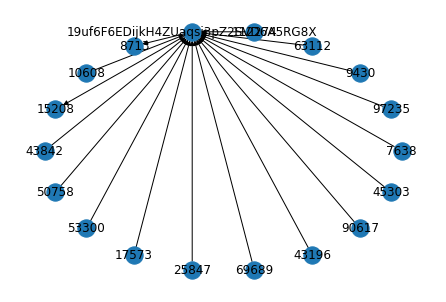

In [73]:
my_node = '19uf6F6EDijkH4ZUaqsi3pZ2SVD6A5RG8X'
get_node_details(g,my_node)

the node 15996 is a transaction

the total input and output addresses related to transaction 15996 are 3

the transaction ' 15996 ' is the input for the following transactions: [] with weights []
the transaction ' 15996 ' has the following output addresses: ['5000000000', '16DNNJzA4FX5f3so2qpcotc2xQv8DGhQV7'] with weights [563317000000, 5000000000]
the total outgoing amount from the transaction ' 15996 ' is 568317000000

the transaction ' 15996 ' is the output for the following transactions: [] with weights []
the transaction ' 15996 ' has the following input addresses: ['1683000000'] with weights [568317000000]
the total incoming amount to the transaction ' 15996 ' is 568317000000

the transaction fee for this transaction 15996 is 0


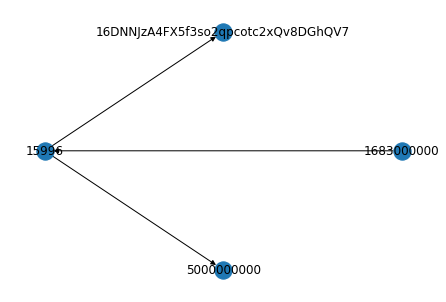

In [74]:
my_node = '15996'
get_node_details(g,my_node)